# EVeMa 2018
![title](evema-logo.jpeg)
- Instructor: M.Sc. Blaž Meden, M.Sc. Žiga Emeršič

- Authors: 
    - Saúl Calderón, Žiga Emeršič, Ángel García, Blaž Meden, Felipe Meza, Juan Esquivel, Martín Solís
    - Mauro Méndez, Manuel Zumbado. 
    
# MNIST Classification with MLP and CNN

## Dataset

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 5s 0us/step


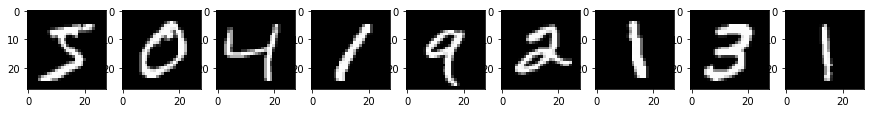

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))

plt.title('MNIST Dataset Samples')

for i in range(9):
    plt.subplot('19'+str(i+1))
    plt.imshow(x_train[i], cmap='gray')

plt.show()

## Data Preparation and Normalization

In [4]:

# For training MLP model we need 1D flattened images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# For training CNN model we need 2D image tensors
img_rows = img_cols = 28
x_train_cnn = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


## Preparing Model

In [5]:
model_mlp = Sequential()
model_mlp.add(Dense(512, activation='relu', input_shape=(784,)))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(num_classes, activation='softmax'))
print("MLP model:")
model_mlp.summary()

model_mlp.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
print("\n-----------------------------------------------------------------------\n")

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


print("CNN model:")
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


MLP model:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________

-----------------------------------------------------------------------

CNN model:
________________________________________

## Training MLP

In [ ]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

history_mlp = model_mlp.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
print(history_mlp.history)
print('Train loss:', history_mlp.history['loss'])
loss = history_mlp.history['loss']
val_loss = history_mlp.history['val_loss']
print('Train accuracy:', history_mlp.history['acc'])
print('Test loss:', history_mlp.history['val_loss'])
print('Test accuracy:', history_mlp.history['val_acc'])

acc = history_mlp.history['acc']
val_acc = history_mlp.history['val_acc']
x = range(len(acc))

plt.figure()
plt.title("Loss")
plt.plot(x, loss, 'r')
plt.plot(x, val_loss, 'r')
plt.show()

plt.figure()
plt.title("Accuracy")
plt.plot(x, acc, 'b')
plt.plot(x, val_acc, 'r')
plt.show()

model_mlp.save_weights('mlp_weights.h5')

score = model_mlp.evaluate(x_test, y_test, verbose=0)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2472 - acc: 0.9239 - val_loss: 0.1042 - val_acc: 0.9679
Epoch 2/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1042 - acc: 0.9684 - val_loss: 0.0739 - val_acc: 0.9772
Epoch 3/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0755 - acc: 0.9776 - val_loss: 0.0780 - val_acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0606 - acc: 0.9817 - val_loss: 0.0728 - val_acc: 0.9791
Epoch 5/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0518 - acc: 0.9847 - val_loss: 0.0782 - val_acc: 0.9787
Epoch 6/10
10752/60000 [====>.........................] - ETA: 1:48 - loss: 0.0428 - acc: 0.9872- ETA: 1:53 - loss: 0.0447 - acc:  - ETA: 1:52 - loss: 0.0430 - acc

## Training CNN

In [ ]:

history = model.fit(x_train_cnn, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_cnn, y_test))

#print(history.history)
print('Train loss:', history.history['loss'])
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Train accuracy:', history.history['acc'])
print('Test loss:', history.history['val_loss'])
print('Test accuracy:', history.history['val_acc'])

acc = history.history['acc']
val_acc = history.history['val_acc']
x = range(len(acc))

plt.figure()
plt.title("Loss")
plt.plot(x, loss, 'r')
plt.plot(x, val_loss, 'r')
plt.show()

plt.figure()
plt.title("Accuracy")
plt.plot(x, acc, 'b')
plt.plot(x, val_acc, 'r')
plt.show()

model.save_weights('cnn_weights.h5')

score = model.evaluate(x_test_cnn, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
41728/60000 [===================>..........] - ETA: 16:41 - loss: 0.2979 - acc: 0.9084

## Prediction

In [ ]:
#model.load_weights("saved_weights.h5")

#print(model.predict(training_data).round())
#plt.imshow(x_test[i], cmap='gray')
#plt.show()

prediction_mlp = model_mlp.predict(x_test[0])
print("MLP prediction: ", prediction_mlp)
prediction_cnn = model.predict(x_test_cnn[0])
print("Cnnediction: ", prediction_cnn

Possible applications:
    - Recognizing handwritten numbers in browser application: http://myselph.de/neuralNet.html

Authors: *Saul Calderon, Angel García, Blaz Meden, Felipe Meza, Juan Esquivel, Martín Solís, Ziga Emersic, Mauro Mendez, Manuel Zumbado*

References:
    - https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
    - https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py
    - https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py